# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [2]:
pip install nbstripout

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)
######################
X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

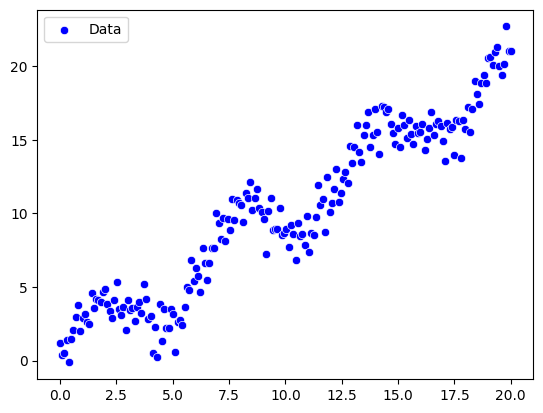

In [4]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [5]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [6]:
df = Simple1DRegressionDataset(X,y)


In [7]:
df[0]


(tensor([0.]), tensor([1.1701]))

In [8]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [9]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[10.3936]])]

In [10]:
# construct the model using Linear block
in_features = 1
out_features = 1
#model_2 = nn.Linear(in_features,out_features)


In [11]:
loss_fn = nn.MSELoss()

In [ ]:
# 

In [26]:
class ComplexRegressor(nn.Module):
    def __init__(self):
        super(ComplexRegressor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)
    
model = ComplexRegressor()


In [27]:
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

In [28]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [29]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [30]:
model = ComplexRegressor().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [31]:
#model_2 = nn.Linear(in_features=1, out_features=1)

In [32]:
train_simple_network(model,
                loss_fn,
                training_loader,
                device=device,
                epochs=10
                )


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

16.908924102783203
120.28738021850586
128.24537897109985
140.8132700920105
494.667151927948
601.8618845939636
826.2124400138855
1059.3262858390808
1168.9835200309753
1523.5064387321472
1830.214904308319
1830.6973766088486
1861.1042121648788
2535.77541577816
2773.563730597496
2982.3360236883163
3099.435457587242
3174.5849479436874
3276.3695701360703
3472.557497382164
3573.045191168785
3825.455362677574
4049.230707526207
4056.4661239385605
4133.383077979088
4137.469763159752
4143.124136805534
4374.489508509636
4474.737067103386
4491.015635371208
4891.95115172863
4892.409645199776
4896.650882840157
4984.973804593086
5036.60761654377
5281.665187954903
5387.120372891426
5621.223308682442
5698.929241299629
5740.209285855293
6220.022884488106
6342.471096158028
6353.301082730293
6353.726616114378
6556.335609644651
6686.4952928721905
6907.109871119261
7111.964714258909
7374.071495264769
7374.164964266121
7418.079236574471
7418.422369219363
7828.583135820925
7829.6693801656365
7889.749958015978


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

47.542781829833984
51.83794021606445
62.17575740814209
219.7762975692749
263.57099056243896
270.7632255554199
270.81754379719496
281.14656239002943
364.0053651854396
374.4214561507106
389.4799812361598
403.06710701435804
581.4008625075221
713.305617146194
717.8251259848475
739.6773903891444
774.4759591147304
841.5282967612147
843.8179867789149
846.795413069427
870.6772451922297
938.9427938982844
942.7324946448207
943.7950056120753
946.6705744788051
949.3120177313685
970.1166689917445
970.4227464720607
1020.7722223326564
1020.9113863036036
1024.7586970850825
1052.439940981567
1090.334559969604
1090.5123639181256
1118.6403679922223
1124.7540831640363
1174.6485495641828
1179.6689601019025
1218.1863246038556
1220.2704782560468
1262.6689119413495
1376.3719835355878
1412.229783065617
1464.871010787785
1467.1853973940015
1494.6457836702466
1514.2417061403394
1521.6712787225842
1538.4691855981946
1539.2799249365926
1539.7350791171193
1583.661314316094
1584.1883208230138
1587.2609395459294
1606

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

135.80438232421875
301.36268615722656
306.5478515625
306.61462407559156
307.6175430342555
337.1634071394801
425.1282051131129
427.45748215168715
571.1001060530543
671.5733802840114
697.5352466627955
816.2088916823268
921.3459079787135
953.0794323012233
976.6241100355983
1090.851084522903
1090.8560931556858
1199.7189395301975
1216.9225947731175
1278.2130954139866
1282.2500150077976
1390.9004208915867
1415.9722516410984
1426.869102227036
1454.0160043113865
1537.4285333030857
1542.6532227867283
1561.0145280235447
1564.1725382679142
1572.4953713291325
1785.667887198273
1797.4183678501286
1974.0139031284489
2054.539408194367
2122.4238381260075
2124.506554591004
2125.714435207192
2145.449428188149
2235.214236842934
2255.1524978750385
2255.9069561832584
2419.5856518619694
2427.8800253742374
2430.341906773392
2443.7505838745274
2447.2356197708286
2459.929974781815
2614.7127811782993
2667.7690899246372
2668.2062464230694
2691.30565934116
2693.4940259926952
2695.4399471753277
2735.125467347447
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.114431381225586
28.785797119140625
46.63060760498047
55.362040519714355
120.83458995819092
166.74164485931396
246.43905544281006
298.1695775985718
351.06329250335693
377.08339405059814
401.8682909011841
401.8723364151083
451.74671843415126
452.3001330769621
456.3957370198332
456.41450525959954
487.10535456379876
525.8748591109179
555.6509478255175
556.1145045920275
558.5571746989153
613.28073121747
618.30780650815
648.4735436602496
654.1316905184649
655.2845651074313
661.3293401165865
728.3669606610201
775.2239018841647
826.0063802166842
914.3737203045748
915.0306648178957
943.1633323593996
977.9976829453371
985.5481342240237
987.4998907013796
1025.7223447724245
1047.8469098969363
1071.944800750818
1071.9602906224318
1111.3437325474806
1116.749440860469
1200.1394860264845
1237.2825257298537
1262.0668847081251
1288.762717914302
1340.0966488835402
1398.8159672734328
1431.9382397648878
1521.0393521306105
1556.4592740056105
1560.4319238183089
1621.7494325158186
1687.2723664757796
1756.09

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

17.643339157104492
43.68033409118652
127.43716239929199
153.8137493133545
153.8784712255001
154.23339480161667
180.8462011218071
202.98527163267136
268.5173150897026
340.97511690855026
351.30251425504684
364.6990768313408
376.5335399508476
388.0793659090996
401.813359439373
435.8290225863457
445.34691256284714
451.64023655653
509.74077290296555
511.03223901987076
586.0551119446754
627.7298555970192
735.0427904725075
740.0039983391762
802.3217931389809
805.0346041321754
813.1781683564186
846.6579199433327
891.87272554636
899.2719364762306
942.6282101273537
957.2269220948219
975.9571447968483
1010.8786039948463
1012.682051718235
1025.158406317234
1051.514004766941
1059.6655150055885
1061.664049565792
1079.6596626639366
1089.797937810421
1122.0363754630089
1136.4849666953087
1156.6288132071495
1218.9289726614952
1248.4015011191368
1347.6011852622032
1365.1445297598839
1390.8672127127647
1392.491509258747
1397.3190997242928
1401.4717958569527
1536.221368610859
1540.1903620362282
1541.32579

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.0560407638549805
19.92393398284912
35.3439245223999
67.92125988006592
89.27903652191162
112.75615978240967
113.85947549343109
119.52193343639374
157.44463622570038
180.14392173290253
192.76958739757538
193.73002016544342
206.147562623024
208.21105802059174
208.48192286491394
213.34859585762024
220.20118165016174
222.23572778701782
262.1948494911194
267.76317834854126
267.7649427737342
303.92260802641977
320.25358641997445
320.6844219948398
325.1108612801181
351.23982284322847
351.2526756954612
357.2479197216453
357.30055028025527
367.3806131464662
384.85613232676405
390.0485923868837
394.65157109324355
396.824339686078
410.42103272501845
411.27809130970854
411.3029120658757
412.7245455478551
414.02451057184953
421.2695643400075
479.35467405070085
557.8414217924001
742.0870577787282
743.5679656957509
750.0182234739186
750.644182691467
751.9601928089978
764.3580094670178
768.3934460972669
777.3309270237805
780.1879395340802
789.3008469437482
797.6713179444196
799.3778826092603
827.1376

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.748299598693848
57.03091907501221
61.5166654586792
63.84070134162903
73.70580792427063
76.35565328598022
99.82791662216187
102.49754166603088
118.0073893070221
118.88240575790405
183.79893255233765
188.29212093353271
243.2657880783081
249.08498430252075
249.3037623912096
256.0173773318529
268.4866842776537
312.13581605255604
313.3353513032198
324.06407864391804
344.0781262665987
370.8318818360567
378.2204707413912
434.1239550858736
435.99033887684345
436.29342682659626
479.93939240276814
522.1344378739595
522.4220099896193
645.3412909954786
655.1052709072828
661.0648937672377
667.1111836880445
667.3682442754507
696.6370030492544
700.3350616544485
731.9620948880911
733.5164350122213
798.4271558374166
799.3224762529135
832.1899384111166
836.8445237725973
892.4416040033102
892.8859535008669
952.604432657361
960.6154027730227
975.5645528584719
981.3872328549623
998.4047156125307
998.4107205113396
1000.8377720555291
1076.1677281102166
1076.1724556433037
1153.1056908117607
1277.94985279906

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

62.68108367919922
70.82598686218262
106.19465827941895
107.68159329891205
141.41401135921478
184.72485196590424
189.50852286815643
247.57754981517792
265.3438729047775
283.2478436231613
286.50439631938934
286.74327333271503
319.29306657612324
356.7755800038576
390.06154115498066
390.2201302498579
433.9264862984419
498.7951233834028
499.8222209662199
533.141587421298
534.693973466754
544.3506621569395
574.9959010332823
581.054315969348
615.3945945948362
632.2020019739866
656.3692211359739
676.709719106555
681.2708939760923
727.7638825625181
734.6804269999266
735.7453123778105
735.763918960467
768.0123167876154
832.4446059111506
863.3087378386408
898.5913229826838
929.3390036467463
949.1517859343439
965.2009955290705
965.2110542468727
965.2122814401519
1021.506070350064
1022.2152600034606
1023.323628161801
1038.6404940828215
1046.102922175778
1052.201142047299
1057.956289981259
1058.9914835437667
1067.5435083850753
1098.5889452442061
1120.4762552722823
1174.84852394904
1177.5825320228469

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.261141777038574
5.273602280765772
9.798830304294825
9.804615835659206
17.118106703273952
41.496579985134304
98.72716317605227
119.84286103677005
151.90363297890872
178.5890749497339
206.27818665932864
212.56351266335696
212.98563165497035
213.91411651205271
215.80291665624827
225.07199300359935
225.09087101835757
241.52754895109683
261.54059903044254
314.9761039437726
319.9768921555951
330.6469303788617
364.9679905595258
373.8606802644208
411.0131155671552
431.5379091920331
432.84376446623355
445.72770420927554
448.9753147782758
468.0903126420453
470.7768615903333
471.1998856784776
471.20633772807196
471.2271686089225
473.7312288773246
474.34055267693475
514.2372773778625
584.9009507787414
592.4076112401672
601.4758952748962
605.8051479947753
605.8617398743518
622.655242681969
623.2094368939288
637.2852864270099
641.5137958531268
643.1705814604647
649.0518318419345
649.5316894357093
675.3197982613929
689.1547382180579
726.9872768227942
729.0962624852546
763.6262193028815
765.19498887

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.12922991812229156
51.066169157624245
51.27891902625561
57.279278084635735
58.19386945664883
70.20883451402187
73.10436497628689
99.96475659310818
101.80304239690304
102.26159228384495
102.93872149288654
109.14597018063068
110.92921145260334
113.59783013164997
115.65519841015339
116.9836940318346
117.01440043002367
125.72596640139818
125.72598531306721
126.80834510386921
129.9904377704952
129.99217881902587
140.65609922155272
152.29644193395507
156.26326980337035
159.18842353567015
159.59120928391349
165.59607779129874
167.0504524622811
176.6531774912728
186.50968383892905
193.12556194409262
193.59495999559294
193.7467004422797
194.01112288876902
218.92887038632762
219.6747589771403
265.65612036630046
265.96319160505664
268.5711694721831
276.0208230976714
276.4562341038836
293.43408406421077
294.4453096453799
349.6551942889346
365.9592447344912
366.03672750189435
368.07051260664593
368.984159304644
411.31686957075726
458.5929468412651
463.6697948713554
464.0009561617626
466.8030463297

In [33]:
# lets try our model
model.to('cpu')

model.eval()

with torch.inference_mode():
    y_pred_m2 = model(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

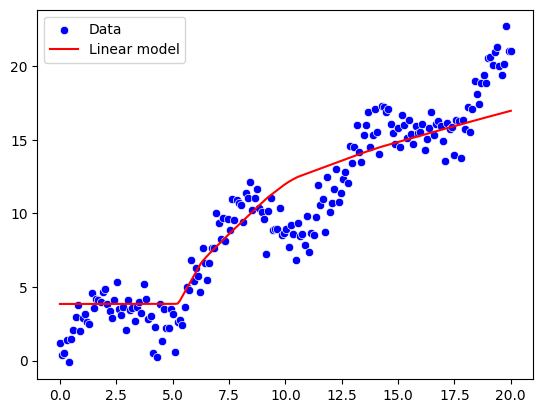

In [34]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
